# "Maximum Likelyhood Estimation"
> "Concepts behind the maximization of a function with random data interpretation"

- toc: true 
- badges: true
- comments: true
- categories: [Math]
- comments: true
- author: Teja Kummarikuntla

# Maximum Likelyhood Estimation
- [Note reference](https://ocw.mit.edu/courses/mathematics/18-650-statistics-for-applications-fall-2016/)

When we do maximum likelyhood estimation, where likelyhood is a function we need to maximize a function.
That's basically what we need to do.

If you get a function you need to know how to maximize this function. Sometimes we have closed-form solutions where you can take the derivative and set it equal to 0 and solve it.

But sometimes, you actually need to resort to algorithms to do that and there's an entire industry doing that.

**Defination:**
Let $(E,(\rm I\!P_{\theta})_{\theta∈Θ})$
be a statistical model associated with a sample
of $i.i.d.$ r.v. $X1, . . . , Xn$. Assume that there exists $θ^* ∈ Θ$ such
that $X_1 ∼ \rm I\!P_\theta∗ : θ^*$ is the true parameter. 
This means:
$| \rm I\!P_{\hat{\theta}}(A) − \rm I\!P_{\theta^*}(A) |$ is small for all $A ⊂ E$.

We have a model on sample space $E$ and some candidate distribuiton $\rm I\!P_{\theta}$. 
And Our goal is to estimate a **True** $\theta^*$, the one that generated some data, $x_1$ to $x_n$ in an $iid$ fashion.

But, this $\theta^*$ is really a porxy for us to know that we actually understand the distribution itself. 
The goal of knowing $\theta^*$ is so that you can actullay is we can know what $\rm I\!P_{\theta}$ is.

And now our goal is to actually come up with the distribution that's close to $\rm I\!P_{\theta^*}$

Here,

$\hat{\theta}$ leads to $\rm I\!P_{\hat{\theta}}$ (Candidate Distribution) <br></br>
$\theta^*$ leads to $\rm I\!P_{\theta^*}$ the *true* $\theta^*$ (**True Distribution**) According to which our data was Drawn

Now, what we want is that If  we compute, Probability of $ \rm I\!P_{\hat{\theta}}$ under some interval $([a,b])$ it should be pertty close to Probability $\rm I\!P_{\theta^*}$ of the same interval $([a,b])$
$$ \rm I\!P_{\hat{\theta}}([a,b]) \tilde  \rm I\!P_{\theta^*}([a,b]) $$

**Statistician’s goal:** given $X1, . . . , Xn,$ find an estimator $\hat{\theta}$ = $\hat{\theta}(X1, . . . , Xn)$ such that $ \rm I\!P_{\hat{\theta}}$ is close to $\rm I\!P_{\theta^*}$ for the true
parameter $θ^*$.

So, In particular, If we want those to be close we should have the absolute value of their difference to be close to 0
$$| {\rm I\!P_{\hat{\theta}}}(A) − \rm I\!P_{\theta^*}(A) |$$ is small for all $A ⊂ E$

### Total Variation Distance
The toatal variation between two probabilities measures:
$$TV(\rm I\!P_{\hat{\theta}}, \rm I\!P_{\theta^*}) = \underset{A ⊂ E}{max} | {\rm I\!P_{\hat{\theta}}}(A) − \rm I\!P_{\theta^*}(A) |$$

So, if the total variation between theta and theta prime is small, it means that for all possible $A's$ that you give, then $\rm I\!P_{\hat{\theta}}(A)$ is going to be close to $\rm I\!P_{\theta^*}(A)$

In [25]:
# Returns the likelyhood value of 2 with mu=3, sigma=7
norm.pdf(3, 7, 2)
# ref: https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

0.02699548325659403

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#x = [2, 3, 4, 5, 7, 8, 9, 10]
x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

In [20]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(x)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


The max LL for sd 0.50 is -167.88
The max LL for sd 1.00 is -54.04
The max LL for sd 1.50 is -36.84
The max LL for sd 2.50 is -32.28
The max LL for sd 3.00 is -32.82
The max LL for sd 3.50 is -33.77


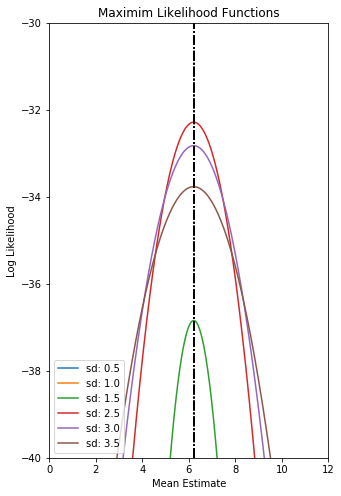

In [21]:
# Plot the Maximum Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
        print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))    
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

plot_ll(x);

In [23]:
print(np.mean(x))
print(np.std(x))

6.214285714285714
2.425418120907092
